A demonstration of 2 and 3 point logistic curve calibration (maybe)

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import curve_fit

Define the form of the adoption curve

In [10]:
def adoption(t, a, b):
    return 1 / (1 + np.exp(-a * (t - b)))

Define the two point calibration data (from Paul's spreadsheet) and plot.

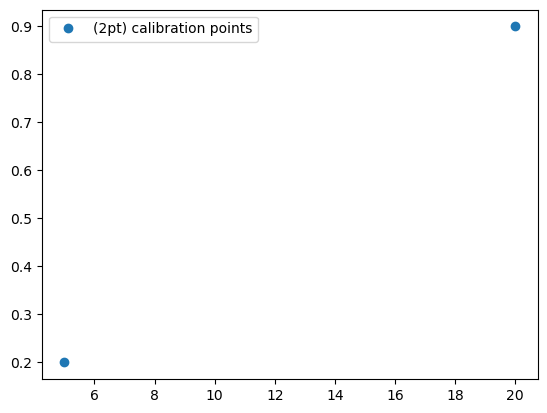

In [11]:
two_point_t = [5, 20]
two_point_f = [0.2, 0.9]

fig, ax=plt.subplots()
ax.plot(
    two_point_t,
    two_point_f,
    marker="o",
    linestyle="",
    label="(2pt) calibration points",
);
ax.legend()

Plot an uncalibrated logistic curve using some made up values for alpha and beta (those will be used as the initial guess at their value for the non-linear curve fitting)


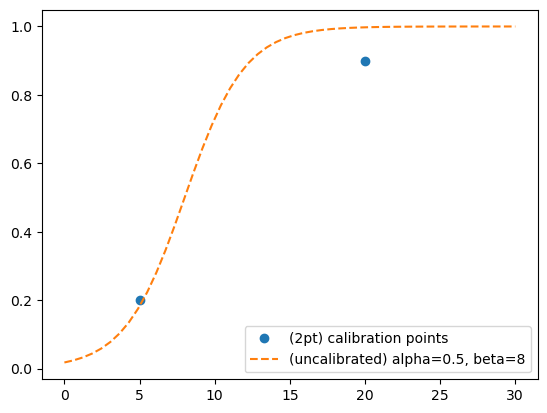

In [12]:
alpha0 = 0.5
beta0 = 8
p_guess = [alpha0, beta0]
t = np.linspace(0, 30)
ax.plot(
    t,
    adoption(t, alpha0, beta0),
    linestyle="--",
    label=f"(uncalibrated) alpha={round(alpha0,2)}, beta={round(beta0,2)}",
);
ax.legend()
fig


Calibrate using the two points and plot

/Users/gre538/miniconda3/envs/jupyter-ai/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


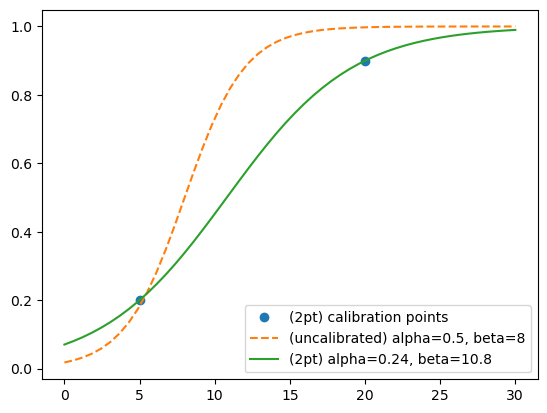

In [13]:
p2_opt = curve_fit(f=adoption, xdata=two_point_t, ydata=two_point_f, p0=p_guess)
two_point_alpha = p2_opt[0][0]
two_point_beta = p2_opt[0][1]
ax.plot(
    t,
    adoption(t, two_point_alpha, two_point_beta),
    label=f"(2pt) alpha={round(two_point_alpha,2)}, beta={round(two_point_beta,2)}",
)
ax.legend()
fig

Calibrate using 3 points (different from the 2 points) and plot

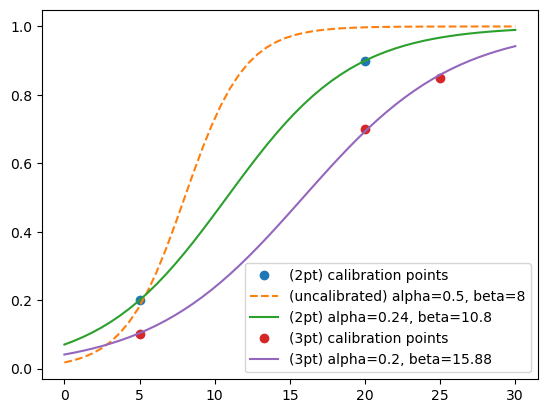

In [14]:
three_point_t = [5, 20, 25]
three_point_f = [0.1, 0.7, 0.85]
ax.plot(
    three_point_t,
    three_point_f,
    marker="o",
    linestyle="",
    label="(3pt) calibration points",
)
p3_opt = curve_fit(f=adoption, xdata=three_point_t, ydata=three_point_f, p0=p_guess)
three_point_alpha = p3_opt[0][0]
three_point_beta = p3_opt[0][1]
ax.plot(
    t,
    adoption(t, three_point_alpha, three_point_beta),
    label=f"(3pt) alpha={round(three_point_alpha,2)}, beta={round(three_point_beta,2)}",
)
ax.legend()
fig